## Import Library

In [1]:
import numpy as np
import pandas as pd

#from sklearn.datasets import load_boston 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

#plt.rcParams['figure.figsize'] = [20, 7]

## load dataset

In [2]:
data = pd.read_csv('credit-card.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Time,V1,V2,V3,V4,V5,V6,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,1,1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,2,2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,3,3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,4,4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [4]:
data.tail()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Time,V1,V2,V3,V4,V5,V6,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9487,3824,9393,119681,75541.0,-1.900113,-1.553794,0.641038,-0.596720,0.281635,-0.942460,...,0.415784,0.238694,0.921948,0.395100,0.057666,0.873632,-0.164887,0.158518,400.00,0
9488,9063,7444,46157,42661.0,-0.300858,-0.191771,2.515639,1.148757,-1.713828,2.040672,...,-1.722045,-0.099946,-0.242349,-0.005970,1.012056,0.012739,0.159847,0.191778,15.00,0
9489,1547,7021,20820,31286.0,1.251400,0.068772,0.728277,0.527328,-0.563445,-0.437373,...,-0.111481,-0.301649,0.021561,-0.095621,0.240199,0.242782,-0.004912,0.023096,10.28,0
9490,1586,8491,178487,123649.0,-1.049419,0.352063,0.140793,-2.227182,0.512059,0.909766,...,0.408928,1.160963,-0.096547,-0.438054,-0.097774,-0.100105,0.302201,0.139351,39.00,0
9491,4516,7726,29003,35273.0,-0.327783,0.845714,0.933787,0.333962,0.621726,0.033314,...,0.001407,-0.014531,-0.270661,-0.756458,0.030521,0.574105,0.060775,0.088282,16.82,0


In [5]:
data.shape


(9492, 34)

In [6]:
data.Class.value_counts()

0    9000
1     492
Name: Class, dtype: int64

In [7]:
# separate fraudulent and non fraudulent data
data_0 = data[data['Class'] == 0]
data_1 = data[data['Class'] == 1]

In [8]:
# take only 9000 0's sameple
data_0 = data_0.sample(n=9000)

In [9]:
data = data_1.append(data_0)

data.Class.value_counts()

0    9000
1     492
Name: Class, dtype: int64

In [10]:
# save as csv
data.to_csv('credit-card.csv')

In [11]:
# check the number of 1s and 0s
count = data['Class'].value_counts()

print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

# print the percentage of question where target == 1
print(count[1]/count[0]* 100)

Fraudulent "1" : 492
Not Fraudulent "0": 9000
5.466666666666667


C:\Users\AJANTHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


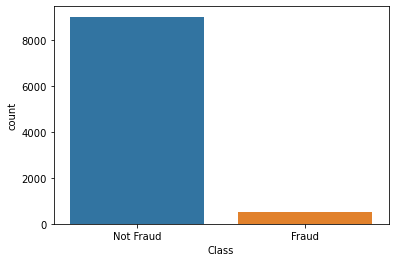

In [12]:
# plot the no of 1's and 0's
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

In [13]:
# check for null values
data.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
Unnamed: 0.1.1    0
Time              0
V1                0
V2                0
V3                0
V4                0
V5                0
V6                0
V7                0
V8                0
V9                0
V10               0
V11               0
V12               0
V13               0
V14               0
V15               0
V16               0
V17               0
V18               0
V19               0
V20               0
V21               0
V22               0
V23               0
V24               0
V25               0
V26               0
V27               0
V28               0
Amount            0
Class             0
dtype: int64

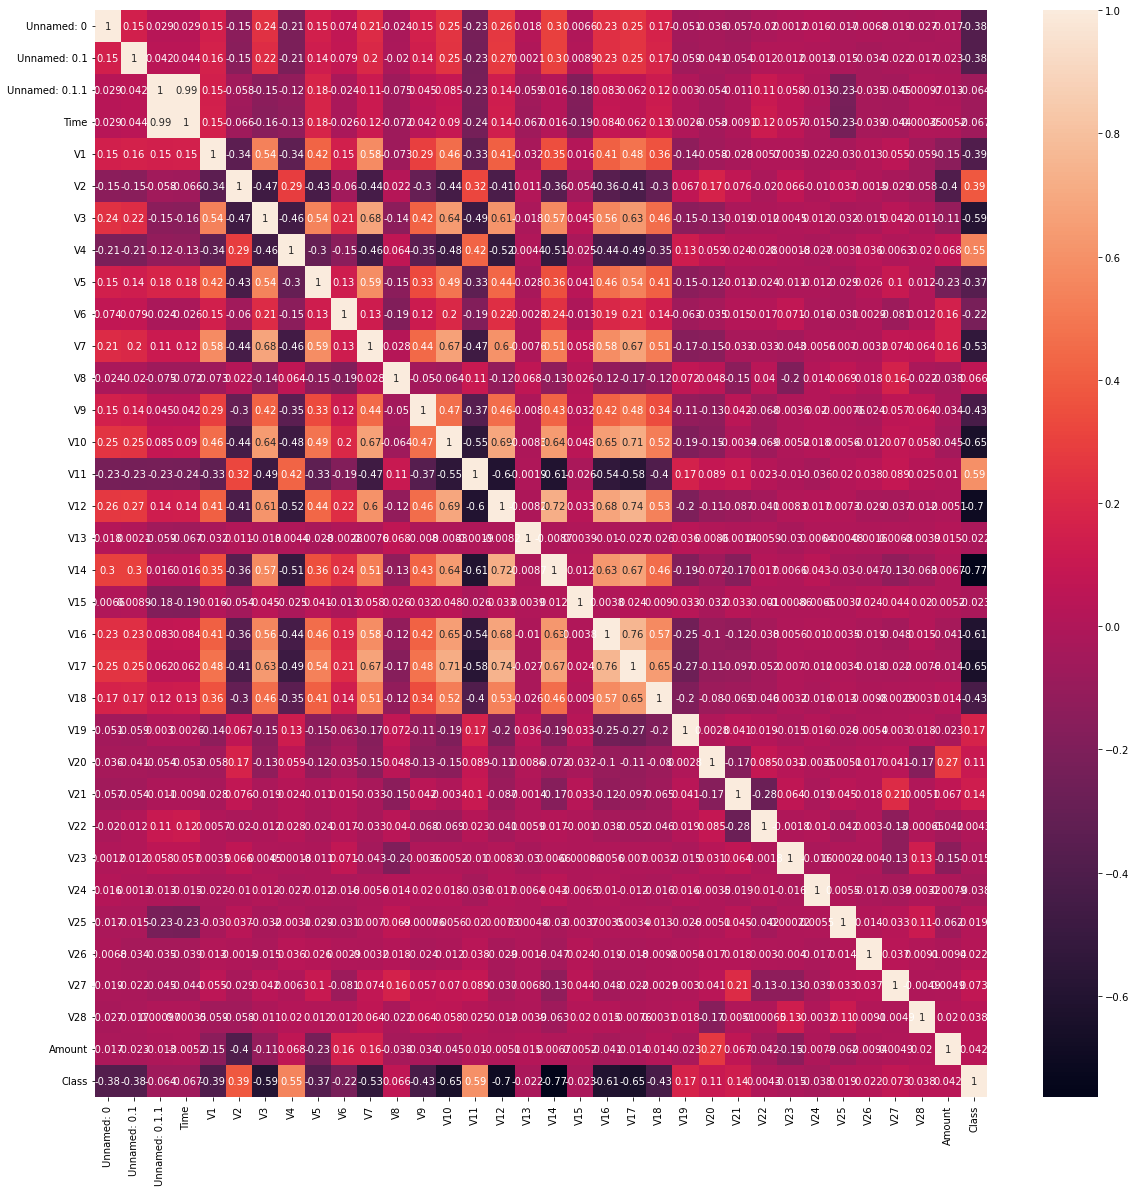

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Respose and Target variable

In [15]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# check length of 1's and 0's
one = np.where(y==1)
zero = np.where(y==0)
len(one[0]), len(zero[0])

(492, 9000)

## Train test split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Fit the model uing Logitic Regression

In [17]:
# create the object
model =  LogisticRegression()

model.fit(x, y)

y_predict = model.predict(x)

C:\Users\AJANTHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
accuracy_score(y_predict, y)

1.0

In [19]:
np.unique(y_predict)

array([0, 1], dtype=int64)

## The matrix trap

In [20]:
# import linrary
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)
print('Roc auc scote:', roc_auc_score(xgb_y_predict, y_test))
print('F1 core:',f1_score(xgb_y_predict, y_test))

Accuracy score is: 1.0
Roc auc scote: 1.0
F1 core: 1.0


In [21]:
confusion_matrix(xgb_y_predict, y_test)

array([[1800,    0],
       [   0,   99]], dtype=int64)

##  Resampling Technique

In [22]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# divie class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

In [23]:
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (9000, 34)

class 1: (492, 34)


## 1. Random under sampling

total class of 1 and 0:
 0    492
1    492
Name: Class, dtype: int64


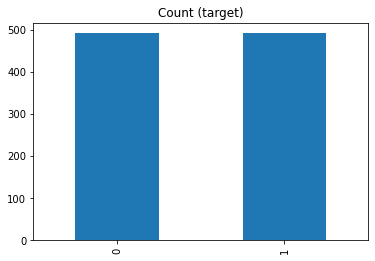

In [24]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Class'].value_counts())

test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## 2. Random over sampling

class count of 1 and 0:
 1    9000
0    9000
Name: Class, dtype: int64


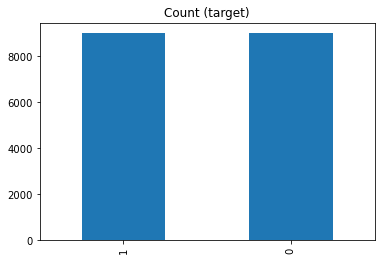

In [25]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_under = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
print('class count of 1 and 0:\n', test_under['Class'].value_counts())

# plot the count
test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## Balance data with imbalance learn module

In [ ]:
# import library
import imblearn

## 3. Random under-sampling with imblearn

In [26]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


## 4.Random over-sampling with imblearn

In [27]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 9000, 1: 492})
Resample dataset shape Counter({1: 9000, 0: 9000})


## 5. under-sampling Tomek links

In [28]:
# load library


from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_tl))

Original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape: Counter({0: 8994, 1: 492})


## 6. Synthetic minority over-sampleing technique

In [29]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(x, y)

print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 9000, 1: 492})
Resampple dataset shape: Counter({1: 9000, 0: 9000})


## 7. NearMiss

In [30]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape: Counter({0: 492, 1: 492})


## 8. Change the performance metric

In [31]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


## 9. penalize algorithm (cost-sensitive training)

In [32]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(x_train, y_train)

svc_predict = svc_model.predict(x_test)

In [33]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.9444444444444444
Accuracy score: 0.894681411269089
F1 score: 0.49748743718592964


## 10. Tree based algorithm

In [34]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train, y_train)

# predict
rfc_predict = rfc.predict(x_test)

In [35]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0
